In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import collections
import math
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

In [5]:
# prediction on Seatguru pictures
df_pred = pd.read_csv('./../Pred/pred_SEATGURU.csv', sep = ';')
df_pred.rename(columns={'img': 'name', 'view' : 'view_pred'}, inplace=True)
df_pred

,name,view_pred,view_proba,manufacturer,manufacturer_proba,type,type_proba
0,Aegean_Airlines_Airbus_A320-200_0.jpg,Int,0.930381,Airbus,0.993214,A320,0.943037
1,Aegean_Airlines_Airbus_A320-200_1.jpg,Meal,0.999615,NaN,NaN,NaN,NaN
2,Aegean_Airlines_Airbus_A320-200_2.jpg,Int,0.990573,Airbus,0.999985,A320,0.998217
3,Aegean_Airlines_Airbus_A320-200_3.jpg,Int,0.977616,Boeing,0.955178,777,0.983588
4,Aegean_Airlines_Airbus_A320-200_4.jpg,Ext_Int,0.979828,NaN,NaN,NaN,NaN
5,Aegean_Airlines_Airbus_A321-200_0.jpg,Int,0.901323,Airbus,0.972107,A321,0.999336
6,Aegean_Airlines_Bombardier_Dash_8_Q400_0.jpg,Ext,0.999078,Boeing,NaN,777,0.979910
7,Aeroflot_Russian_Airlines_Airbus_330_200_0.jpg,Int,0.996685,Airbus,0.999612,A330,0.947625
8,Aeroflot_Russian_Airlines_Airbus_330_200_1.jpg,Ext,0.790060,Airbus,NaN,A350,0.392714
9,Aeroflot_Russian_Airlines_Airbus_330_200_2.jpg,Meal,0.997782,NaN,NaN,NaN,NaN


In [8]:
# real observations
df_real = pd.read_csv('./../Pred/g7_SEATGURU_annotate_pers.csv', sep = ';')
df_real

,name,format,height,width,height_to_width,ncol,aircraft_manufacturer,aircraft_type,view,Person
0,Cathay_Pacific_Airways_Boeing_777-300ER_C_0.jpg,jpg,540,960,0.562500,3,Boeing,777,Meal,no
1,KLM_Airbus_A330-300_1.jpg,jpg,720,960,0.750000,3,Airbus,A330,Int,no
2,American_Airlines_Boeing_767-300_3.jpg,jpg,720,720,1.000000,3,Boeing,767,Int,no
3,Air_Canada_Boeing_767-300ER_v2_3.jpg,jpg,720,960,0.750000,3,Boeing,767,Meal,no
4,United_Airlines_Q400_A_2.jpg,jpg,720,960,0.750000,3,Other,NaN,Ext,no
5,American_Airlines_Boeing_787-8_1.jpg,jpg,720,720,1.000000,3,Boeing,787,Int,no
6,Edelweiss_Air_A340-300_0.jpg,jpg,720,960,0.750000,3,Other,NaN,Int,no
7,Etihad_Airways_Airbus_A380_0.jpg,jpg,720,960,0.750000,3,Airbus,A380,Int,no
8,United_Airlines_Boeing_767_300_ER_1.jpg,jpg,720,960,0.750000,3,Boeing,767,Int,no
9,Iberia_Airbus_A330-200_0.jpg,jpg,720,960,0.750000,3,Airbus,A330,Others,no


In [9]:
# merge of the two dataframes
df = pd.merge(df_pred, df_real)
df

,name,view_pred,view_proba,manufacturer,manufacturer_proba,type,type_proba,format,height,width,height_to_width,ncol,aircraft_manufacturer,aircraft_type,view,Person
0,Aegean_Airlines_Airbus_A320-200_0.jpg,Int,0.930381,Airbus,0.993214,A320,0.943037,jpg,720,720,1.000000,3,Airbus,A320,Int,no
1,Aegean_Airlines_Airbus_A320-200_1.jpg,Meal,0.999615,NaN,NaN,NaN,NaN,jpg,720,720,1.000000,3,Airbus,A320,Meal,no
2,Aegean_Airlines_Airbus_A320-200_2.jpg,Int,0.990573,Airbus,0.999985,A320,0.998217,jpg,720,720,1.000000,3,Airbus,A320,Int,no
3,Aegean_Airlines_Airbus_A320-200_3.jpg,Int,0.977616,Boeing,0.955178,777,0.983588,jpg,720,960,0.750000,3,Airbus,A320,Int,no
4,Aegean_Airlines_Airbus_A320-200_4.jpg,Ext_Int,0.979828,NaN,NaN,NaN,NaN,jpg,720,540,1.333333,3,Airbus,A320,Ext_Int,no
5,Aegean_Airlines_Airbus_A321-200_0.jpg,Int,0.901323,Airbus,0.972107,A321,0.999336,jpg,720,960,0.750000,3,Airbus,A321,Int,no
6,Aegean_Airlines_Bombardier_Dash_8_Q400_0.jpg,Ext,0.999078,Boeing,NaN,777,0.979910,jpg,720,960,0.750000,3,Other,NaN,Ext,no
7,Aeroflot_Russian_Airlines_Airbus_330_200_0.jpg,Int,0.996685,Airbus,0.999612,A330,0.947625,jpg,720,960,0.750000,3,Airbus,A330,Int,no
8,Aeroflot_Russian_Airlines_Airbus_330_200_1.jpg,Ext,0.790060,Airbus,NaN,A350,0.392714,jpg,720,960,0.750000,3,Airbus,A330,Ext,no
9,Aeroflot_Russian_Airlines_Airbus_330_200_2.jpg,Meal,0.997782,NaN,NaN,NaN,NaN,jpg,720,960,0.750000,3,Airbus,A330,Meal,no


## Function to build confusion matrix

In [10]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() if normalize else cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Confusions matrix

### Confusion matrix for view model

In [11]:
y_true_view = list(df['view'])
y_pred_view = list(df['view_pred'])
labels_view=['Int', 'Ext', 'Ext_Int', 'Meal']
confusion_matrix_view = confusion_matrix(y_true_view, y_pred_view, labels = labels_view)

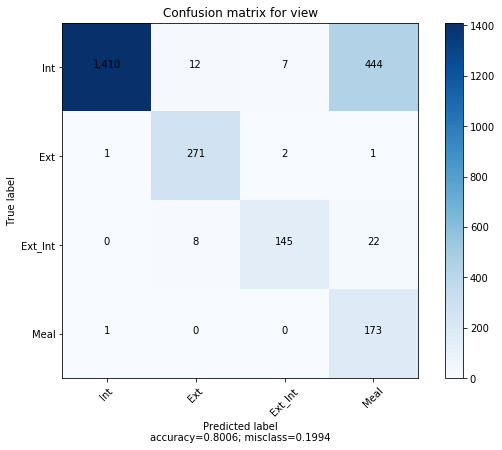

In [12]:
plot_confusion_matrix(confusion_matrix_view, labels_view, title = 'Confusion matrix for view' , normalize=False)

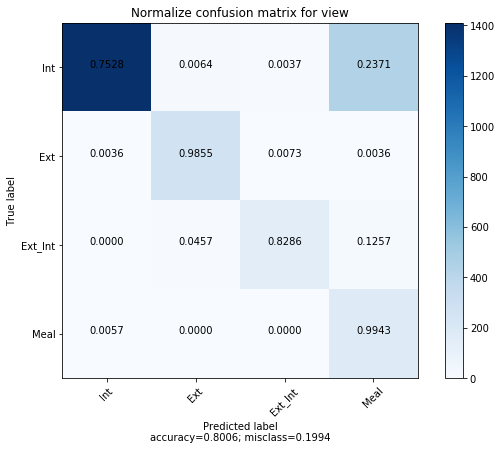

In [13]:
plot_confusion_matrix(confusion_matrix_view, labels_view, title = 'Normalize confusion matrix for view', 
                      normalize=True)

### Confusion matrix for exterior constructor

In [14]:
# real view = 'Ext'
df_ext = df.loc[df['view']=='Ext']
# confusion matrix for exterior
y_true_ext = list(df_ext['aircraft_manufacturer'])
y_pred_ext = list(df_ext['manufacturer'])
labels_ext_man=['Airbus', 'Boeing']

confusion_matrix_ext = confusion_matrix(y_true_ext, y_pred_ext, labels = labels_ext_man)

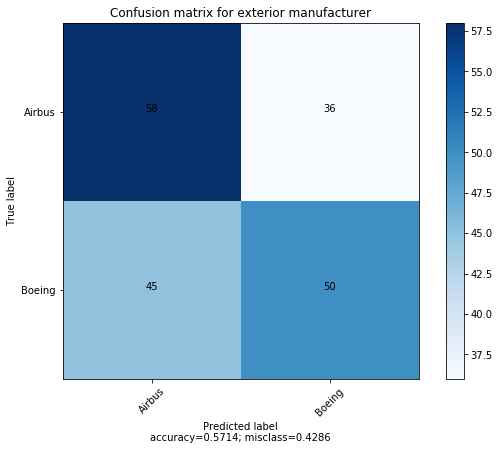

In [15]:
plot_confusion_matrix(confusion_matrix_ext, labels_ext_man, title = 'Confusion matrix for exterior manufacturer', 
                      normalize=False)

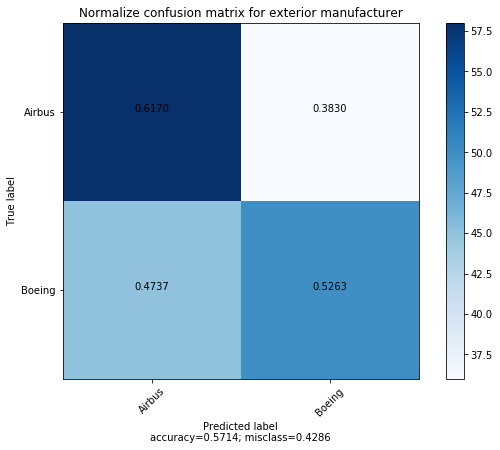

In [16]:
plot_confusion_matrix(confusion_matrix_ext, labels_ext_man, 
                      title = 'Normalize confusion matrix for exterior manufacturer' , normalize=True)

### Confusion matrix for exterior model (Airbus and Boeing)

In [17]:
# Creation of a new matrix which contains only models we want
df_col = list(df.columns)
df_constructeur_int = pd.DataFrame(columns = df_col)

# Airplanes
labels_mod = list(df['type'].unique())
del labels_mod[1] # suppression nan
labels_mod = sorted(labels_mod)

# index of rows when aircraft type is in labels(models we want to keep)
list_ = list()
for i in range(len(df)):
    if df['aircraft_type'][i] in labels_mod:
        list_.append(i)

df_constructeur_ext = df.iloc[list_]
df_constructeur_ext = df_constructeur_ext.loc[df_constructeur_ext['view'] == 'Ext']

In [18]:
# confusion matrix for exterior models
y_true_ext_mod = list(df_constructeur_ext['aircraft_type'])
y_pred_ext_mod = list(df_constructeur_ext['type'])
confusion_matrix_ext_mod = confusion_matrix(y_true_ext_mod, y_pred_ext_mod, labels = labels_mod)

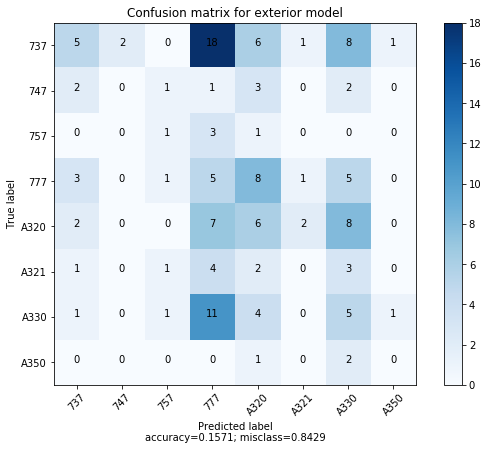

In [19]:
plot_confusion_matrix(confusion_matrix_ext_mod, labels_mod, 
                      title = 'Confusion matrix for exterior model' , normalize=False)

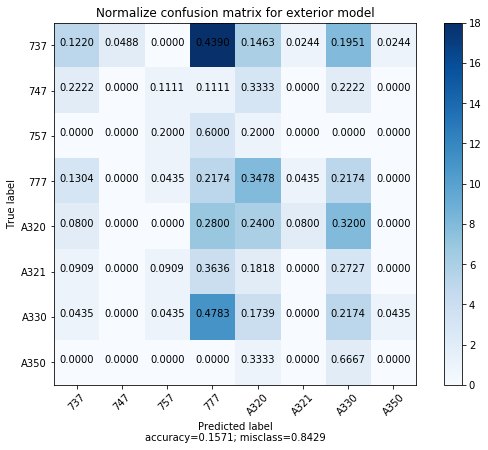

In [20]:
plot_confusion_matrix(confusion_matrix_ext_mod, labels_mod, 
                      title = 'Normalize confusion matrix for exterior model' , normalize=True)

### Confusion matrix for interior constructor

In [21]:
# real view = 'Int'
df_int = df.loc[df['view']=='Int']
# confusion matrix for exterior
y_true_int = list(df_int['aircraft_manufacturer'])
y_pred_int = list(df_int['manufacturer'])
labels_int_man=['Airbus', 'Boeing']

confusion_matrix_int = confusion_matrix(y_true_int, y_pred_int, labels = labels_int_man)

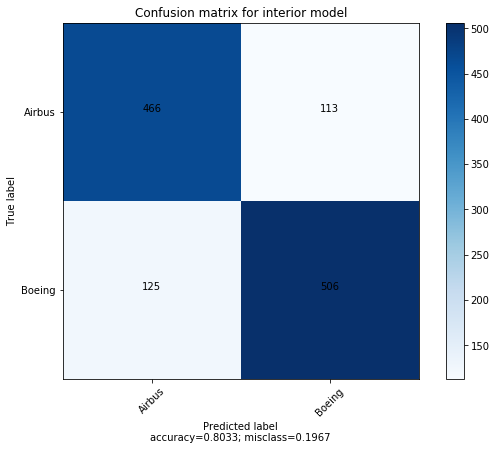

In [22]:
plot_confusion_matrix(confusion_matrix_int, labels_int_man, 
                      title = 'Confusion matrix for interior model' , normalize=False)

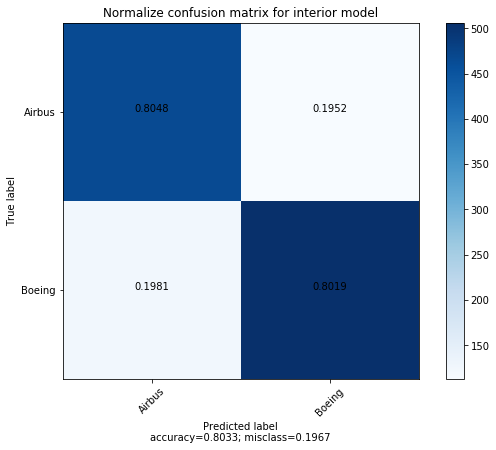

In [23]:
plot_confusion_matrix(confusion_matrix_int, labels_int_man, 
                      title = 'Normalize confusion matrix for interior model' , normalize=True)

### Confusion matrix for interior model (Airbus and Boeing)

In [24]:
# Creation of a new matrix which contains only models we want
df_col = list(df.columns)

# Airplanes
labels_mod_int = list(df['type'].unique())
del labels_mod_int[1] # suppression nan
labels_mod_int = sorted(labels_mod_int)

# index of rows when aircraft type is in labels(models we want to keep)
list_int = list()
for i in range(len(df)):
    if df['aircraft_type'][i] in labels_mod_int:
        list_int.append(i)

df_models_int = df.iloc[list_int]
df_models_int = df_models_int.loc[df_models_int['view'] == 'Int']

In [25]:
# confusion matrix for exterior models
y_true_int_mod = list(df_models_int['aircraft_type'])
y_pred_int_mod = list(df_models_int['type'])
confusion_matrix_int_mod = confusion_matrix(y_true_int_mod, y_pred_int_mod, labels = labels_mod_int)

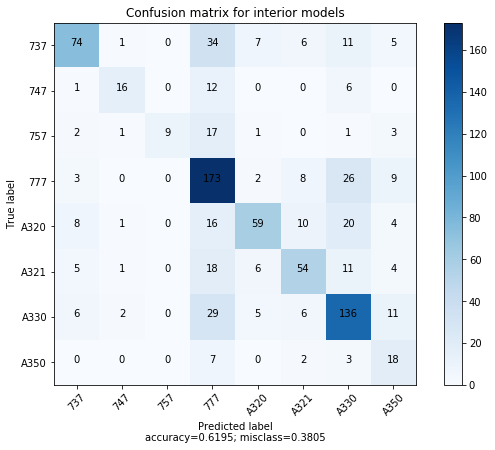

In [26]:
plot_confusion_matrix(confusion_matrix_int_mod, labels_mod_int, 
                      title = 'Confusion matrix for interior models' , normalize=False)

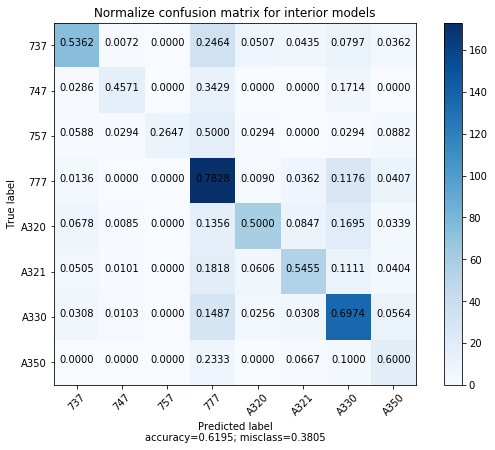

In [27]:
plot_confusion_matrix(confusion_matrix_int_mod, labels_mod_int, 
                      title = 'Normalize confusion matrix for interior models' , normalize=True)

# Precision/recall function

In [28]:
# count the number of true positive, false positive, true negative, false negative
def precision_recall(real_value, pred_value, val):
    nb_tp = 0
    nb_fn = 0
    nb_fp = 0
    nb_tn = 0
    
    for i in real_value.index:
        # True positive
        if real_value[i] == val and pred_value[i] == val:
            nb_tp += 1
        # False negative
        if real_value[i] == val and pred_value[i] != val :
            nb_fn +=1
        # False positive
        if real_value[i] != val and pred_value[i] == val:
            nb_fp += 1
        # True negative
        if real_value[i] != val and pred_value[i] != val:
            nb_tn += 1
    
    if nb_tp > 0 and nb_fp > 0:
        precision = nb_tp / (nb_tp + nb_fp)
    else:
        precision = 0
    if nb_tp > 0 and nb_tn > 0:
        recall = nb_tp / (nb_tp + nb_fn)
    else:
        recall = 0
    
    #return nb_tp
    return 'Class: ' + val, 'Precision ={:0.4f} , Recall = {:0.4f}'.format(precision, recall)

## First model : Int, Ext, Ext_Int, Meal

In [111]:
pr_int = precision_recall(df['view'], df['view_pred'], 'Int')

In [112]:
pr_ext = precision_recall(df['view'], df['view_pred'], 'Ext')

In [113]:
pr_ei = precision_recall(df['view'], df['view_pred'], 'Ext_Int')

In [114]:
pr_meal = precision_recall(df['view'], df['view_pred'], 'Meal')

## Exterior manufacturer : Airbus or Boeing

In [127]:
# Predict value = 'Ext'
df_ext = df.loc[df['view_pred'] == 'Ext']

# Airbus
pr_ext_airbus = precision_recall(df_ext['aircraft_manufacturer'], df_ext['manufacturer'], 'Airbus')

In [128]:
# Boeing
pr_ext_boeing = precision_recall(df_ext['aircraft_manufacturer'], df_ext['manufacturer'], 'Boeing')

## Exterior : Models of Airbus

In [35]:
df_ext_Airbus = df_ext.loc[df['manufacturer'] == 'Airbus']

In [133]:
# A320
pr_ext_A320 = precision_recall(df_ext_Airbus['aircraft_type'], df_ext_Airbus['type'], 'A320')

In [134]:
# A321
pr_ext_A321 = precision_recall(df_ext_Airbus['aircraft_type'], df_ext_Airbus['type'], 'A321')

In [135]:
# A330
pr_ext_A330 = precision_recall(df_ext_Airbus['aircraft_type'], df_ext_Airbus['type'], 'A330')

In [136]:
# A350
pr_ext_A350 = precision_recall(df_ext_Airbus['aircraft_type'], df_ext_Airbus['type'], 'A350')

## Exterior : Models of Boeing

In [40]:
df_ext_Boeing = df_ext.loc[df['manufacturer'] == 'Boeing']

In [140]:
# 737
pr_ext_737 = precision_recall(df_ext_Boeing['aircraft_type'], df_ext_Boeing['type'], '737')

In [141]:
# 747
pr_ext_747 = precision_recall(df_ext_Boeing['aircraft_type'], df_ext_Boeing['type'], '747')

In [142]:
# 757
pr_ext_757 = precision_recall(df_ext_Boeing['aircraft_type'], df_ext_Boeing['type'], '757')

In [143]:
# 777
pr_ext_777 = precision_recall(df_ext_Boeing['aircraft_type'], df_ext_Boeing['type'], '777')

## Interior manufacturer  : Airbus or Boeing

In [146]:
df_int = df.loc[df['view_pred'] == 'Int']

# Airbus
pr_int_airbus = precision_recall(df_int['aircraft_manufacturer'], df_int['manufacturer'], 'Airbus')

In [147]:
# Boeing
pr_int_boeing = precision_recall(df_int['aircraft_manufacturer'], df_int['manufacturer'], 'Boeing')

## Interior : Models of Airbus

In [47]:
df_int_Airbus = df_int.loc[df['manufacturer'] == 'Airbus']

In [149]:
# A320
pr_int_A320 = precision_recall(df_int_Airbus['aircraft_type'], df_int_Airbus['type'], 'A320')

In [150]:
# A321
pr_int_A321 = precision_recall(df_int_Airbus['aircraft_type'], df_int_Airbus['type'], 'A321')

In [151]:
# A330
pr_int_A330 = precision_recall(df_int_Airbus['aircraft_type'], df_int_Airbus['type'], 'A330')

In [152]:
# A350
pr_int_A350 = precision_recall(df_int_Airbus['aircraft_type'], df_int_Airbus['type'], 'A350')

## Interior : Models of Boeing

In [52]:
df_int_Boeing = df_int.loc[df['manufacturer'] == 'Boeing']

In [153]:
# 737
pr_int_737 = precision_recall(df_int_Boeing['aircraft_type'], df_int_Boeing['type'], '737')

In [154]:
# 747
pr_int_747 = precision_recall(df_int_Boeing['aircraft_type'], df_int_Boeing['type'], '747')

In [155]:
# 757
pr_int_757 = precision_recall(df_int_Boeing['aircraft_type'], df_int_Boeing['type'], '757')

In [156]:
# 777
pr_int_777 = precision_recall(df_int_Boeing['aircraft_type'], df_int_Boeing['type'], '777')

# HISTOGRAMMME

In [57]:
df.isnull().sum()

name                        0
view_pred                   0
view_proba                  0
manufacturer              840
manufacturer_proba       1137
type                      840
type_proba                840
format                      0
height                      0
width                       0
height_to_width             0
ncol                        0
aircraft_manufacturer       0
aircraft_type             401
view                        0
Person                      0
dtype: int64

In [74]:
def histogramme(df, column, filter_1 = None, filter_2 = None, type_col = ['pred', 'real']):
    list_view = ['Int', 'Ext', 'Ext_Int', 'Meal']
    list_aircraftmanufacturer = ['Airbus', 'Boeing']
    list_aircrafttype = ['A320', 'A321', 'A330', 'A350','737', '747' '757', '777']
    hist = {}
    for i in range(len(df)):
        if df[column][i] in list_aircrafttype or df[column][i] in list_view or df[column][i] in list_aircraftmanufacturer :
            
            if filter_1 != None and type_col == 'pred' and df['view_pred'][i] == filter_1:
                if df[column][i] in hist :
                    hist[df[column][i]] += 1
                else :
                    hist[df[column][i]] = 1 
                    
            if filter_1 != None and type_col == 'real' and df['view'][i] == filter_1:
                if df[column][i] in hist :
                    hist[df[column][i]] += 1
                else :
                    hist[df[column][i]] = 1      
                    
            if filter_2 != None and type_col == 'pred' and df['manufacturer'][i] == filter_2 and filter_1 != None and type_col == 'pred' and df['view_pred'][i] == filter_1 :
                if df[column][i] in hist :
                    hist[df[column][i]] += 1
                else :
                    hist[df[column][i]] = 1
                    
                    
            if filter_2 != None and type_col == 'real' and df['aircraft_manufacturer'][i] == filter_2 and filter_1 != None and type_col == 'real' and df['view'][i] == filter_1:
                if df[column][i] in hist :
                    hist[df[column][i]] += 1
                else :
                    hist[df[column][i]] = 1
            
            if filter_1 == None and filter_2 == None :
                if df[column][i] in hist :
                    hist[df[column][i]] += 1
                else :
                    hist[df[column][i]] = 1
    return collections.OrderedDict(sorted(hist.items())) 

In [63]:
def affichage(histogramme, color = 'b'):
    plt.bar(histogramme.keys(), histogramme.values(), color = color)

### repartition view

In [123]:
histogramme(df, 'view') #reel

OrderedDict([('Ext', 275), ('Ext_Int', 175), ('Int', 1873), ('Meal', 174)])

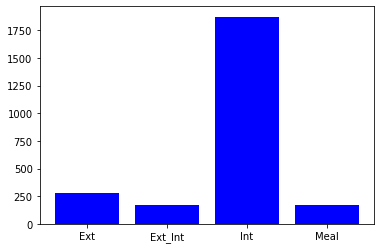

In [122]:
affichage(histogramme(df, 'view')) #prediction

In [124]:
histogramme(df, 'view_pred') #prediction

OrderedDict([('Ext', 297), ('Ext_Int', 157), ('Int', 1419), ('Meal', 683)])

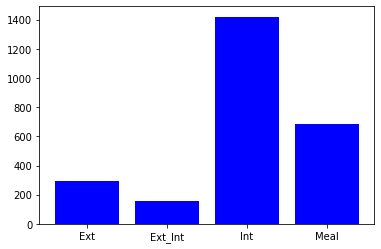

In [125]:
affichage(histogramme(df, 'view_pred')) #prediction

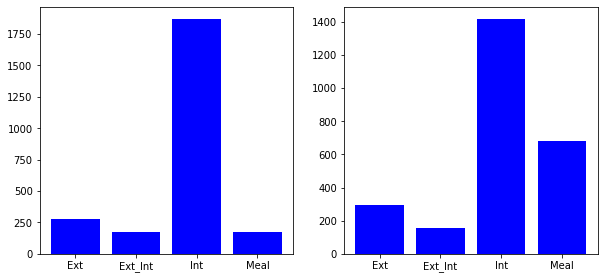

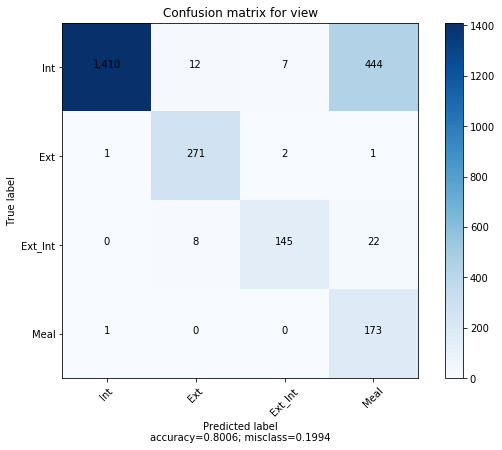

('Class: Int', 'Precision =0.9937 , Recall = 0.7528') 
 ('Class: Ext', 'Precision =0.9125 , Recall = 0.9855') 
 ('Class: Ext_Int', 'Precision =0.9236 , Recall = 0.8286') 
 ('Class: Meal', 'Precision =0.2533 , Recall = 0.9943')


In [131]:
plt.figure(figsize=(10,10))
plt.subplot(223)
affichage(histogramme(df, 'view')) #reel
plt.subplot(224)
affichage(histogramme(df, 'view_pred')) #prediction
#plt.subplot(212)
plot_confusion_matrix(confusion_matrix_view, labels_view, title = 'Confusion matrix for view' , normalize=False)
print(pr_int, '\n', pr_ext, '\n', pr_ei, '\n', pr_meal)

### repartition exterior constructor

In [68]:
histogramme(df, 'aircraft_manufacturer', filter_1 = 'Ext', type_col = 'real') 

OrderedDict([('Airbus', 96), ('Boeing', 96)])

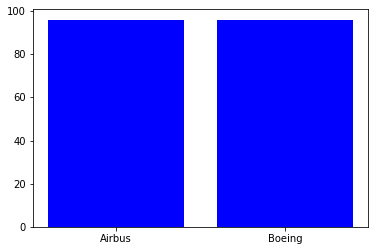

In [69]:
affichage(histogramme(df, 'aircraft_manufacturer', filter_1 = 'Ext', type_col = 'real'))

In [70]:
histogramme(df, 'manufacturer', filter_1 = 'Ext', type_col = 'pred')

OrderedDict([('Airbus', 169), ('Boeing', 128)])

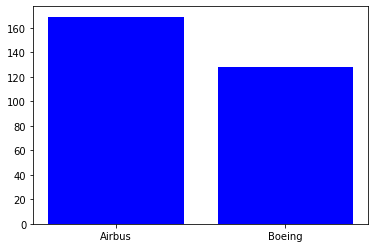

In [71]:
affichage(histogramme(df, 'manufacturer', filter_1 = 'Ext', type_col = 'pred'))

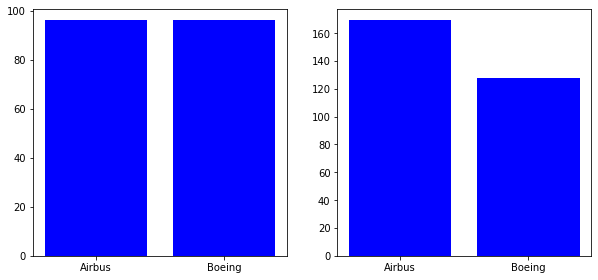

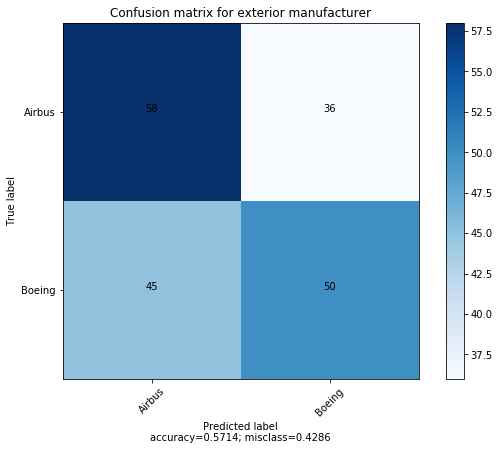

('Class: Airbus', 'Precision =0.3728 , Recall = 0.5943') 
 ('Class: Boeing', 'Precision =0.4453 , Recall = 0.5327')


In [130]:
plt.figure(figsize=(10,10))
plt.subplot(223)
affichage(histogramme(df, 'aircraft_manufacturer', filter_1 = 'Ext', type_col = 'real'))
plt.subplot(224)
affichage(histogramme(df, 'manufacturer', filter_1 = 'Ext', type_col = 'pred'))
#plt.subplot(212)
plot_confusion_matrix(confusion_matrix_ext, labels_ext_man, title = 'Confusion matrix for exterior manufacturer',
                      normalize=False)
print(pr_ext_airbus, '\n', pr_ext_boeing)

###  repartition modele airbus exterior

In [76]:
histogramme(df, 'aircraft_type', filter_1 = 'Ext', filter_2 = 'Airbus', type_col = 'real')

OrderedDict([('737', 42),
             ('777', 23),
             ('A320', 52),
             ('A321', 22),
             ('A330', 46),
             ('A350', 6)])

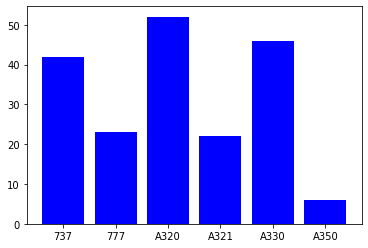

In [77]:
affichage(histogramme(df, 'aircraft_type', filter_1 = 'Ext', filter_2 = 'Airbus', type_col = 'real'))

In [78]:
histogramme(df, 'type', filter_1 = 'Ext', filter_2 = 'Airbus', type_col = 'pred')

OrderedDict([('737', 23),
             ('777', 93),
             ('A320', 148),
             ('A321', 24),
             ('A330', 150),
             ('A350', 16)])

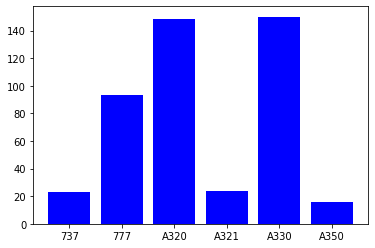

In [79]:
affichage(histogramme(df, 'type', filter_1 = 'Ext', filter_2 = 'Airbus', type_col = 'pred'))

### repartition modele boeing exterior

In [80]:
histogramme(df, 'aircraft_type', filter_1 = 'Ext', filter_2 = 'Boeing', type_col = 'real')

OrderedDict([('737', 84),
             ('777', 46),
             ('A320', 26),
             ('A321', 11),
             ('A330', 23),
             ('A350', 3)])

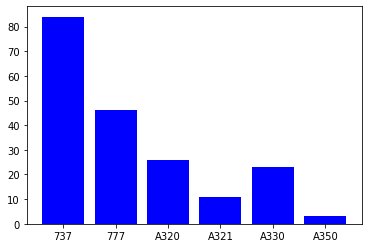

In [81]:
affichage(histogramme(df, 'aircraft_type', filter_1 = 'Ext', filter_2 = 'Boeing', type_col = 'real'))

In [82]:
histogramme(df, 'type', filter_1 = 'Ext', filter_2 = 'Boeing', type_col = 'pred')

OrderedDict([('737', 46),
             ('777', 186),
             ('A320', 74),
             ('A321', 12),
             ('A330', 75),
             ('A350', 8)])

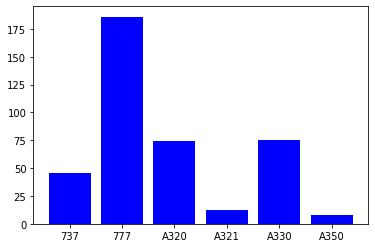

In [83]:
affichage(histogramme(df, 'type', filter_1 = 'Ext', filter_2 = 'Boeing', type_col = 'pred'))

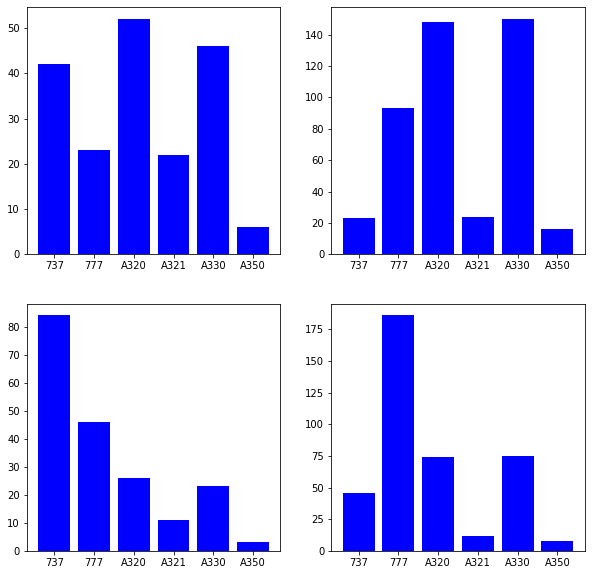

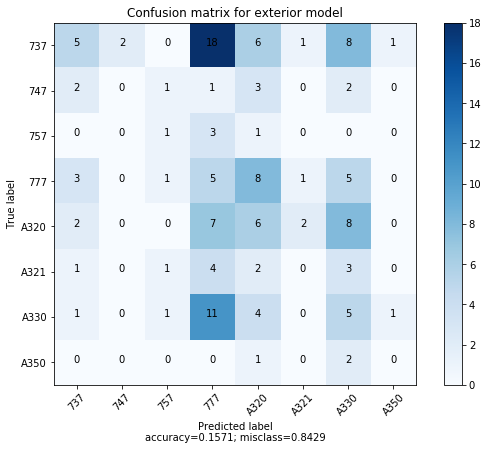

('Class: A320', 'Precision =0.0946 , Recall = 0.3889') 
 ('Class: A321', 'Precision =0.0833 , Recall = 0.1429') 
 ('Class: A330', 'Precision =0.0667 , Recall = 0.4545') 
 ('Class: A350', 'Precision =0.0000 , Recall = 0.0000') 
 ('Class: 737', 'Precision =0.2174 , Recall = 0.1923') 
 ('Class: 747', 'Precision =0.0000 , Recall = 0.0000') 
 ('Class: 757', 'Precision =0.1429 , Recall = 0.2500') 
 ('Class: 777', 'Precision =0.0753 , Recall = 0.5833')


In [145]:
plt.figure(figsize=(10,10))
plt.subplot(221)
affichage(histogramme(df, 'aircraft_type', filter_1 = 'Ext', filter_2 = 'Airbus', type_col = 'real'))
plt.subplot(222)
affichage(histogramme(df, 'type', filter_1 = 'Ext', filter_2 = 'Airbus', type_col = 'pred'))
plt.subplot(223)
affichage(histogramme(df, 'aircraft_type', filter_1 = 'Ext', filter_2 = 'Boeing', type_col = 'real'))
plt.subplot(224)
affichage(histogramme(df, 'type', filter_1 = 'Ext', filter_2 = 'Boeing', type_col = 'pred'))
plot_confusion_matrix(confusion_matrix_ext_mod, labels_mod,
                      title = 'Confusion matrix for exterior model' , normalize=False)
print(pr_ext_A320, '\n', pr_ext_A321, '\n', pr_ext_A330, '\n', pr_ext_A350, '\n',
      pr_ext_737, '\n', pr_ext_747, '\n', pr_ext_757, '\n', pr_ext_777)

### repartition interior constructor

In [84]:
histogramme(df, 'aircraft_manufacturer', filter_1 = 'Int', type_col = 'real')

OrderedDict([('Airbus', 766), ('Boeing', 839)])

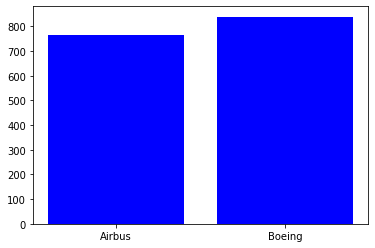

In [85]:
affichage(histogramme(df, 'aircraft_manufacturer', filter_1 = 'Int', type_col = 'real'))

In [86]:
histogramme(df, 'manufacturer', filter_1 = 'Int', type_col = 'pred')

OrderedDict([('Airbus', 712), ('Boeing', 707)])

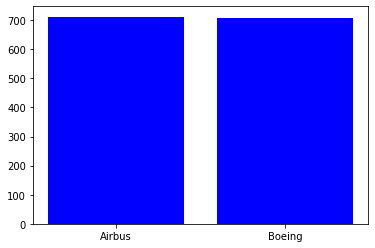

In [87]:
affichage(histogramme(df, 'manufacturer', filter_1 = 'Int', type_col = 'pred'))

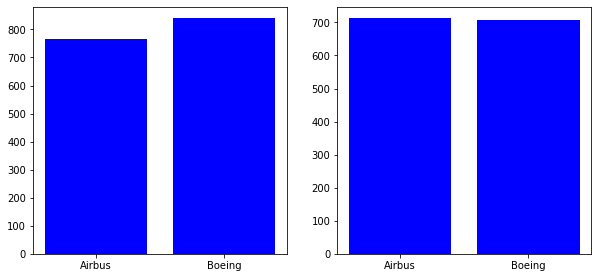

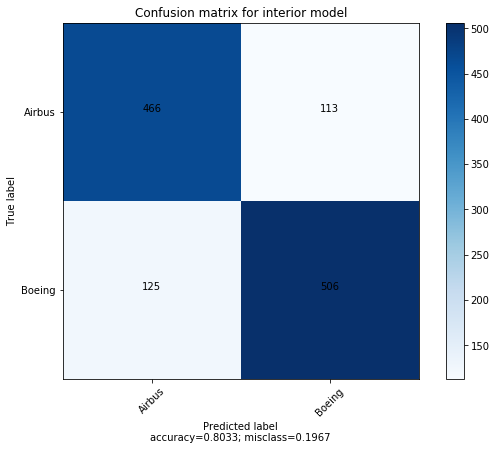

('Class: Airbus', 'Precision =0.6531 , Recall = 0.8101') 
 ('Class: Boeing', 'Precision =0.7157 , Recall = 0.7994')


In [148]:
plt.figure(figsize=(10,10))
plt.subplot(223)
affichage(histogramme(df, 'aircraft_manufacturer', filter_1 = 'Int', type_col = 'real'))
plt.subplot(224)
affichage(histogramme(df, 'manufacturer', filter_1 = 'Int', type_col = 'pred'))
plot_confusion_matrix(confusion_matrix_int, labels_int_man,
                      title = 'Confusion matrix for interior model' , normalize=False)
print(pr_int_airbus, '\n', pr_int_boeing )

### repartition modele airbus interior

In [88]:
histogramme(df, 'aircraft_type', filter_1 = 'Int', filter_2 = 'Airbus', type_col = 'real')

OrderedDict([('737', 201),
             ('777', 274),
             ('A320', 324),
             ('A321', 238),
             ('A330', 524),
             ('A350', 78)])

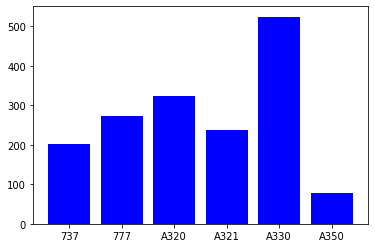

In [89]:
affichage(histogramme(df, 'aircraft_type', filter_1 = 'Int', filter_2 = 'Airbus', type_col = 'real'))

In [90]:
histogramme(df, 'type', filter_1 = 'Int', filter_2 = 'Airbus', type_col = 'pred')

OrderedDict([('737', 145),
             ('777', 518),
             ('A320', 284),
             ('A321', 282),
             ('A330', 686),
             ('A350', 172)])

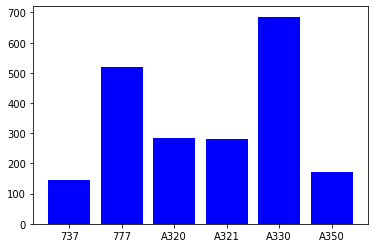

In [91]:
affichage(histogramme(df, 'type', filter_1 = 'Int', filter_2 = 'Airbus', type_col = 'pred'))

### repartition modele boeing interior

In [92]:
histogramme(df, 'aircraft_type', filter_1 = 'Int', filter_2 = 'Boeing', type_col = 'real')

OrderedDict([('737', 402),
             ('777', 548),
             ('A320', 162),
             ('A321', 119),
             ('A330', 262),
             ('A350', 39)])

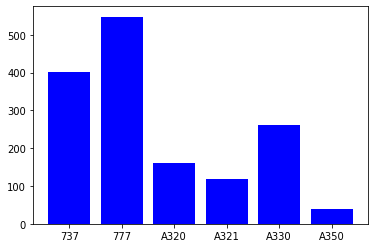

In [93]:
affichage(histogramme(df, 'aircraft_type', filter_1 = 'Int', filter_2 = 'Boeing', type_col = 'real'))

In [94]:
histogramme(df, 'type', filter_1 = 'Int', filter_2 = 'Boeing', type_col = 'pred')

OrderedDict([('737', 290),
             ('777', 1036),
             ('A320', 142),
             ('A321', 141),
             ('A330', 343),
             ('A350', 86)])

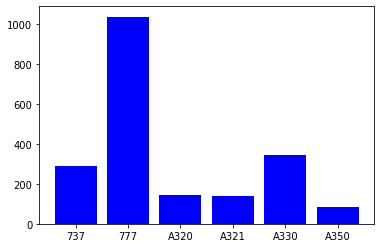

In [95]:
affichage(histogramme(df, 'type', filter_1 = 'Int', filter_2 = 'Boeing', type_col = 'pred'))

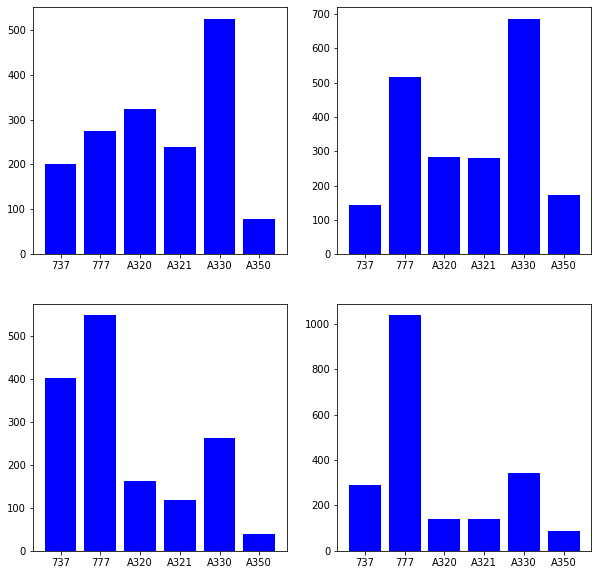

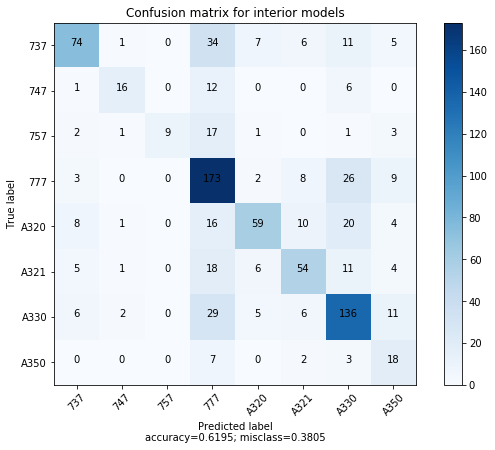

('Class: A320', 'Precision =0.4085 , Recall = 0.6304') 
 ('Class: A321', 'Precision =0.3759 , Recall = 0.7162') 
 ('Class: A330', 'Precision =0.3965 , Recall = 0.8608') 
 ('Class: A350', 'Precision =0.2093 , Recall = 0.7826') 
 ('Class: 737', 'Precision =0.5103 , Recall = 0.6727') 
 ('Class: 747', 'Precision =0.4571 , Recall = 0.5517') 
 ('Class: 757', 'Precision =0.0000 , Recall = 0.3103') 
 ('Class: 777', 'Precision =0.3301 , Recall = 0.9828')


In [159]:
plt.figure(figsize=(10,10))
plt.subplot(221)
affichage(histogramme(df, 'aircraft_type', filter_1 = 'Int', filter_2 = 'Airbus', type_col = 'real'))
plt.subplot(222)
affichage(histogramme(df, 'type', filter_1 = 'Int', filter_2 = 'Airbus', type_col = 'pred'))
plt.subplot(223)
affichage(histogramme(df, 'aircraft_type', filter_1 = 'Int', filter_2 = 'Boeing', type_col = 'real'))
plt.subplot(224)
affichage(histogramme(df, 'type', filter_1 = 'Int', filter_2 = 'Boeing', type_col = 'pred'))
plot_confusion_matrix(confusion_matrix_int_mod, labels_mod_int,
                      title = 'Confusion matrix for interior models' , normalize=False)
print(pr_int_A320, '\n', pr_int_A321, '\n',pr_int_A330, '\n', pr_int_A350, '\n',
      pr_int_737, '\n', pr_int_747, '\n',pr_int_757, '\n', pr_int_777)
